In [231]:
import json
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import pylab as pl
import zipfile
import pandas as pd
import geopandas as gp

#HW 10 CLUSTERING BUSINESS

#cluster time trends in NYC businesses: 
#DATA
#Census Business data:
##download census data for businesses by ZIP code. the data is here
http://www.census.gov/econ/cbp/download/
##and it can be downloaded by hand. you can also download it with 3 terminal commands as follows: the data from 1993 through 2001 is different in the format of its path than the data after 2001 (that is why more than one for loop is needed)



#NYC zip codes shape file is here
##http://data.nycprepared.org/dataset/nyc-zip-code-tabulation-areas/resource/0c0e14e9-78e1-404e-97b0-c2fabceb3981


NOTES: 
to read in a zip file without unzipping it you can use the pandas and zipfile packages

In [233]:
ziplist = []
for i in range(len(data['features'])):
    zipcode = int(data['features'][i]['properties']["postalCode"])
    ziplist.append(zipcode)
ziplist.sort()
ziplist = ziplist[1:len(ziplist)]

In [234]:
fname = 'zbp'+'99'+'totals'+'.zip'
zf = zipfile.ZipFile(fname)
df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))

In [235]:
zip_list = []
est_list = []
for i in range(len(df)):
    if df['ZIP'][i] in ziplist:
        zip_list.append(df['ZIP'][i])
        est_list.append(df['EST'][i])


In [236]:
import pandas as pd

import zipfile #i am not giving it a name cause i intend to use it only once

nl = ['94','95','96','97','98','99',
      '00','01','02','03','04','05','06',
      '07','08','09','10','11','12','13']
year_list = []
for item in nl:
    fname = 'zbp'+item+'totals'+'.zip'
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    item_list= []
    e_name = 'EST'+item
    for item in df.columns:
        item = item.upper()
        item_list.append(item)
    df.columns = item_list
    zip_list = []
    est_list = []
    print e_name
    for i in range(len(df)):
        if df['ZIP'][i] in ziplist:
            zip_list.append(df['ZIP'][i])
            est_list.append(df['EST'][i])
    year_list.append({'ZIP':zip_list,e_name:est_list})

EST94
EST95
EST96
EST97
EST98
EST99
EST00
EST01
EST02
EST03
EST04
EST05
EST06
EST07
EST08
EST09
EST10
EST11
EST12
EST13


In [237]:
year_list = []
year_list.append({'ZIP':zip_list,'EST'+item:est_list})

In [238]:
import pandas as pd

import zipfile #i am not giving it a name cause i intend to use it only once

nl = ['94','95','96','97','98','99',
      '00','01','02','03','04','05','06',
      '07','08','09','10','11','12','13']
year_list = []
for item in nl:
    fname = 'zbp'+item+'totals'+'.zip'
    zf = zipfile.ZipFile(fname)
    df = pd.read_csv(zf.open(fname.replace('.zip','.txt')))
    item_list= []
    e_name = 'EST'+item
    for item in df.columns:
        item = item.upper()
        item_list.append(item)
    df.columns = item_list
    zip_list = []
    est_list = []
    print e_name
    for i in range(len(df)):
        if df['ZIP'][i] in ziplist:
            zip_list.append(df['ZIP'][i])
            est_list.append(df['EST'][i])
    year_list.append({'ZIP':zip_list,e_name:est_list})

EST94
EST95
EST96
EST97
EST98
EST99
EST00
EST01
EST02
EST03
EST04
EST05
EST06
EST07
EST08
EST09
EST10
EST11
EST12
EST13


In [239]:
dic_merge = pd.DataFrame(year_list[0])

In [240]:
for i in range(len(year_list)-1):
    ddic = pd.DataFrame(year_list[i+1])
    dic_merge = pd.merge(dic_merge,ddic)

In [241]:
dic_merge.head()

EST94    ZIP  EST95  EST96  EST97  EST98  EST99  EST00  EST01  EST02  \
0   6999  10001   7088   7075   7154   7254   7233   7317   7188   7141   
1   1784  10002   1819   1919   2049   2003   2085   2277   2543   2269   
2   3256  10003   3377   3417   3535   3649   3659   3683   3602   3616   
3   1115  10004   1124   1133   1173   1176   1233   1294   1247   1253   
4   1076  10005   1109   1216   1227   1270   1242   1287   1249   1244   

   ...    EST04  EST05  EST06  EST07  EST08  EST09  EST10  EST11  EST12  EST13  
0  ...     7370   7312   7415   7549   7472   7305   7241   7227   7235   7273  
1  ...     2551   2682   2686   2685   2691   2775   2872   2912   2954   2988  
2  ...     3776   3867   3909   4049   4071   4099   4113   4159   4214   4277  
3  ...     1283   1260   1311   1370   1376   1379   1398   1404   1442   1479  
4  ...     1226   1214   1259   1273   1291   1274   1266   1301   1273   1296  

[5 rows x 21 columns]

In [242]:
zzp = []
for i in range(len(dic_merge)):
    zzp.append(dic_merge['ZIP'][i])

In [243]:
dic_merge.keys()

dicc = {'1994':dic_merge[u'EST94'],'1995':dic_merge[u'EST95'],'1996':dic_merge[u'EST96'],
       '1997':dic_merge[u'EST97'],'1998':dic_merge[u'EST98'],'1999':dic_merge[u'EST99'],
       '2000':dic_merge[u'EST00'],'2001':dic_merge[u'EST01'],'2002':dic_merge[u'EST02'],
       '2003':dic_merge[u'EST03'],'2004':dic_merge[u'EST04'],'2005':dic_merge[u'EST05'],
        '2006':dic_merge[u'EST06'],'2007':dic_merge[u'EST07'],'2008':dic_merge[u'EST08'],
        '2009':dic_merge[u'EST09'],'2010':dic_merge[u'EST10'],'2011':dic_merge[u'EST11'],
        '2012':dic_merge[u'EST12'],'2013':dic_merge[u'EST13']}
dataset = pd.DataFrame(dicc)
    

In [244]:
dataset.index = zzp

In [375]:
dataset.head()

1994  1995  1996  1997  1998  1999  2000  2001  2002  2003  2004  2005  \
10001  6999  7088  7075  7154  7254  7233  7317  7188  7141  7084  7370  7312   
10002  1784  1819  1919  2049  2003  2085  2277  2543  2269  2402  2551  2682   
10003  3256  3377  3417  3535  3649  3659  3683  3602  3616  3704  3776  3867   
10004  1115  1124  1133  1173  1176  1233  1294  1247  1253  1252  1283  1260   
10005  1076  1109  1216  1227  1270  1242  1287  1249  1244  1200  1226  1214   

       2006  2007  2008  2009  2010  2011  2012  2013  
10001  7415  7549  7472  7305  7241  7227  7235  7273  
10002  2686  2685  2691  2775  2872  2912  2954  2988  
10003  3909  4049  4071  4099  4113  4159  4214  4277  
10004  1311  1370  1376  1379  1398  1404  1442  1479  
10005  1259  1273  1291  1274  1266  1301  1273  1296

In [246]:
dataset1 = []
for i in range(len(dataset)):
    dataset1.append((dataset.iloc[i]-np.mean(dataset.iloc[i]))/np.std(dataset.iloc[i]))

In [247]:
year_list = []
for i in range(20):
    year_list.append(str(1994+i))

In [248]:
dataset2 = pd.DataFrame(dataset1)[year_list]

In [249]:
dataset2.head()

1994      1995      1996      1997      1998      1999      2000  \
10001 -1.831632 -1.173250 -1.269418 -0.685012  0.054742 -0.100607  0.520787   
10002 -1.722813 -1.631907 -1.372173 -1.034519 -1.153997 -0.941015 -0.442326   
10003 -1.872528 -1.457250 -1.319968 -0.914985 -0.523731 -0.489411 -0.407041   
10004 -1.608897 -1.523770 -1.438643 -1.060302 -1.031926 -0.492790  0.084181   
10005 -2.885957 -2.304004 -0.417066 -0.223082  0.535220  0.041442  0.835014   

           2001      2002      2003      2004      2005      2006      2007  \
10001 -0.433496 -0.781180 -1.202840  0.912857  0.483799  1.245746  2.237017   
10002  0.248565 -0.463105 -0.117659  0.269344  0.609595  0.619984  0.617387   
10003 -0.685038 -0.636989 -0.334968 -0.087861  0.224456  0.368602  0.849090   
10004 -0.360370 -0.303619 -0.313078 -0.019863 -0.237409  0.244976  0.803030   
10005  0.164887  0.076712 -0.699225 -0.240717 -0.452336  0.341236  0.588125   

           2008      2009      2010      2011      2012      2013  
10001  1.667406  0.432016 -0.041426 -0.144992 -0.085811  0.195295  
10002  0.632971  0.851147  1.103089  1.206982  1.316071  1.404380  
10003  0.924595  1.020693  1.068741  1.226616  1.415379  1.631598  
10004  0.859781  0.888157  1.067869  1.124620  1.484044  1.834010  
10005  0.905554  0.605760  0.464681  1.081903  0.588125  0.993729

In [250]:
from sklearn.cluster import KMeans
est=KMeans(n_clusters=3,n_init=100)
est.fit(dataset)
labels=est.labels_

In [251]:
labels

array([2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

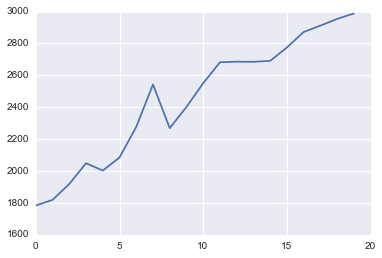

In [252]:
plt.plot(dataset.iloc[1])

## Pick cluster  
code is from ADS Session 5

2 clusters: 0.561611135742
3 clusters: 0.530531696129
4 clusters: 0.42388512067
5 clusters: 0.264869730724
6 clusters: 0.215068217125
7 clusters: 0.213279589475
8 clusters: 0.165521904934
9 clusters: 0.151553889814
10 clusters: 0.174928247939
11 clusters: 0.146909363249
Best for 2 clusters: 0.561611135742


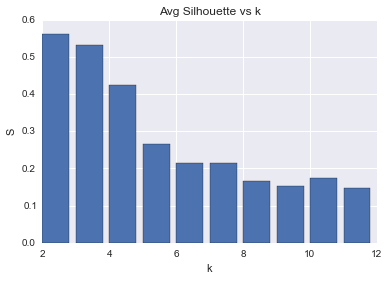

In [326]:
from sklearn.metrics import silhouette_score
s=[0]*10
for k in range(0,10):
    est=KMeans(n_clusters=k+2,n_init=150)
    est.fit(dataset2)
    s[k]=silhouette_score(dataset2, est.labels_)
    print('{0} clusters: {1}'.format(k+2,s[k]))
k=np.argmax(s)    
est=KMeans(n_clusters=k+2,n_init=100)
est.fit(dataset2)
labels=est.labels_
plt.figure()
plt.bar(range(2,12),s)
plt.xlabel('k')
plt.ylabel('S')
plt.title('Avg Silhouette vs k')
print('Best for {0} clusters: {1}'.format(k+2,silhouette_score(dataset2, labels)))

## Plot Cluster

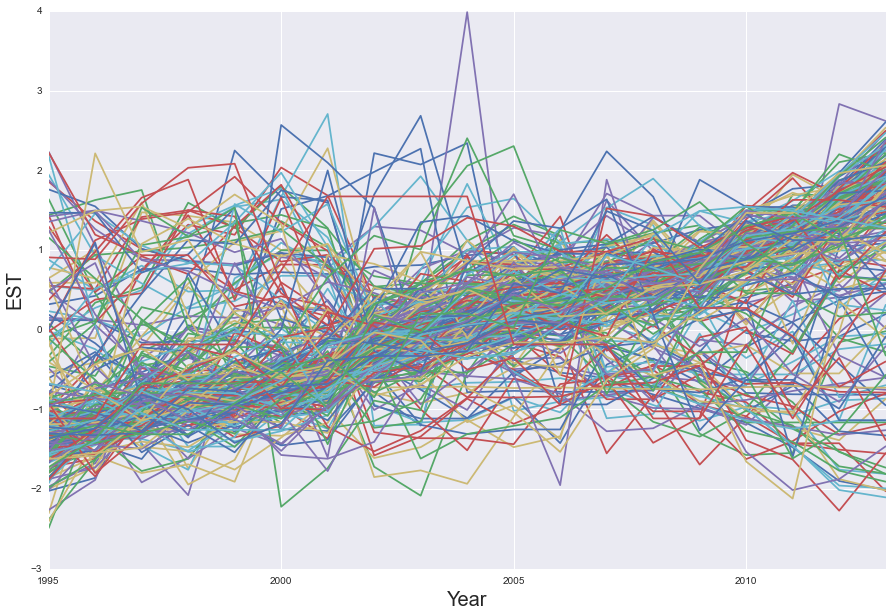

In [256]:
f = plt.figure(figsize=(15,10))
ax1 = plt.subplot(1,1,1) 
ax1.spines["top"].set_visible(False)  ## set the top frame invisible
ax1.spines["right"].set_visible(False) ## set the right frame invisible
ax1.get_xaxis().tick_bottom()  
ax1.get_yaxis().tick_left()  
for i in range(len(dataset)):
    plt.plot(range(1994,2014),dataset2.iloc[i])
plt.axis([1995, 2013, -3,4]) 
plt.ylabel('EST',fontsize=20)
plt.xlabel('Year',fontsize=20)

In [308]:
for i in range(len(zip_plot)):
    zip_plot['postalCode'][i]= int(zip_plot['postalCode'][i])

/Users/luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app


In [340]:
def cluster(n,dataset2):
    est=KMeans(n_clusters=n,n_init=100)
    est.fit(dataset)
    labels=est.labels_
    df_label = pd.DataFrame({'label':labels})
    df_label.index = zzp
    dataset3 = dataset2.join(df_label)
    return dataset3

In [345]:
def cluster_plot(n,dataset3):
    for i in range(n):
        data_byl = dataset3[dataset3['label'] == i]
        m = len(data_byl)
        sum_zip = 0
        for i in range(m):
            sum_zip = sum_zip + data_byl.iloc[i]
        avg_zip = sum_zip[0:len(sum_zip)-1] /m
        f = plt.figure(figsize=(10,6))
        ax1 = plt.subplot(1,1,1) 
        ax1.spines["top"].set_visible(False)  ## set the top frame invisible
        ax1.spines["right"].set_visible(False) ## set the right frame invisible
        ax1.get_xaxis().tick_bottom()  
        ax1.get_yaxis().tick_left()
        for i in range(len(dataset)):
            plt.plot(range(1994,2014),dataset2.iloc[i],'grey',alpha=0.4)
        plt.plot(range(1994,2014),avg_zip,'#31a354',linewidth=15,alpha=0.8)
        plt.axis([1995, 2013, -3,4]) 
        plt.ylabel('EST',fontsize=20)
        plt.xlabel('Year',fontsize=20)

In [360]:
def cluster_geoplot(n,dataset3):
    zip_plot = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
    zip_data = pd.DataFrame({'postalCode':zzp,'label':list(dataset3['label'])})
    for i in range(len(zip_plot)):
        zip_plot['postalCode'][i]= int(zip_plot['postalCode'][i])
    zip_plot = pd.merge(zip_plot,zip_data)
    colormaps = ['#addd8e','#31a354','#fc9272','#de2d26','#fdbb84','#a1d99b']
    f = plt.figure(figsize=(15,10))
    zip_plot.plot(column='label',categorical=True, legend=True,colormap ='YlGnBu',alpha=0.7)
    

In [364]:
def cluster_p(n):
    cluster_n = cluster(n,dataset2)
    cluster_plot(n,cluster_n)
    cluster_geoplot(n,cluster_n)

## Cluster for 2 groups

/Users/luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


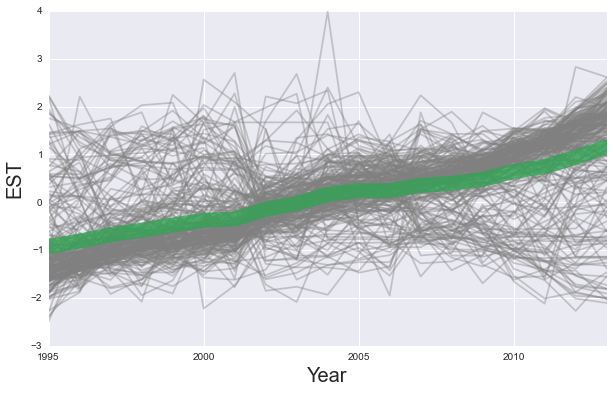

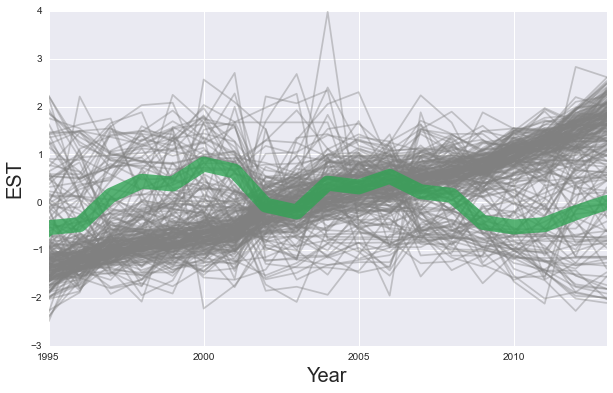

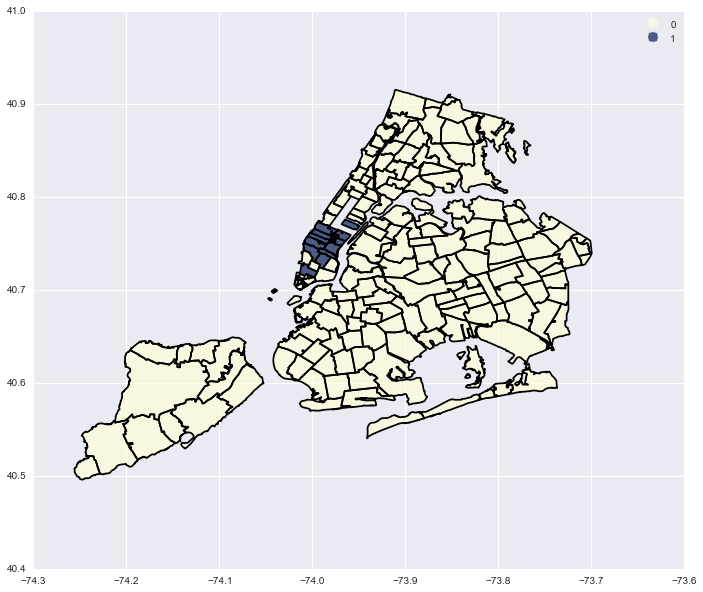

In [365]:
cluster_p(2)

## Cluster for 3 groups

/Users/luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


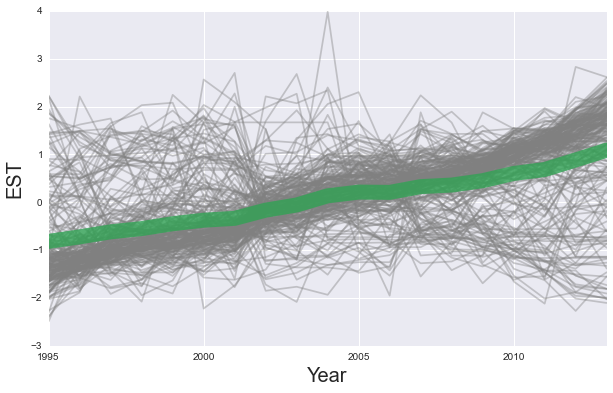

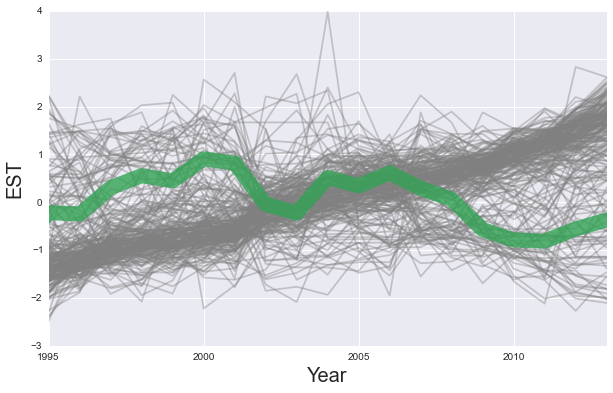

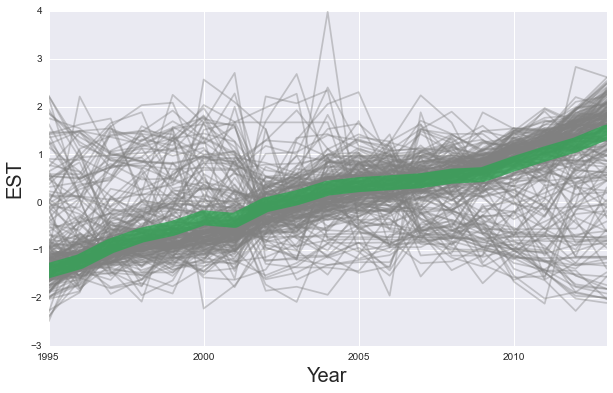

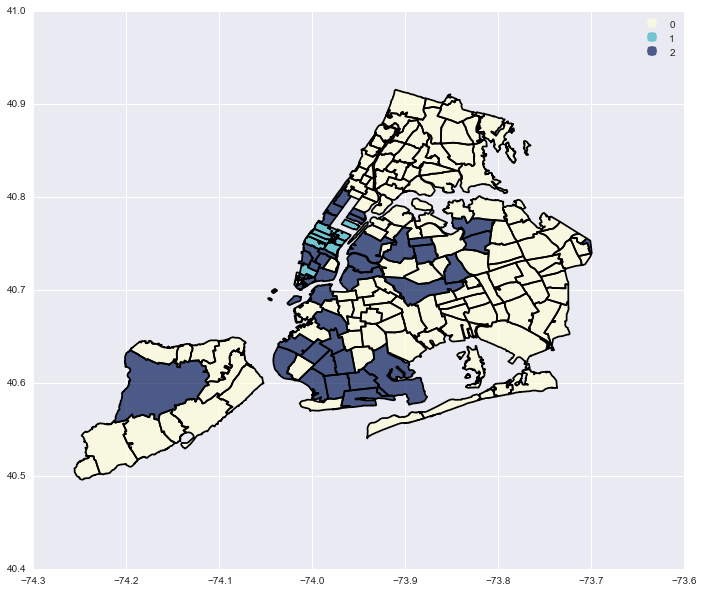

In [366]:
cluster_p(3)

## Cluster for 4 groups

/Users/luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


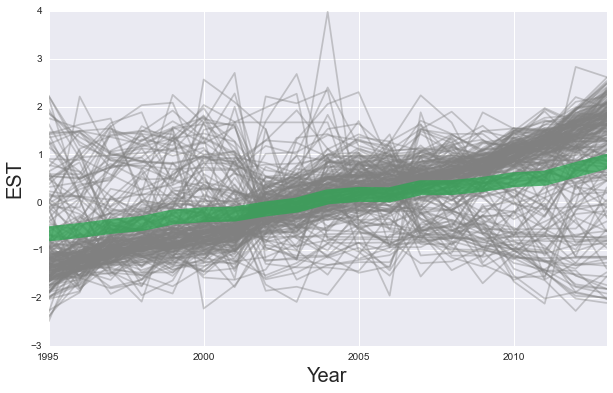

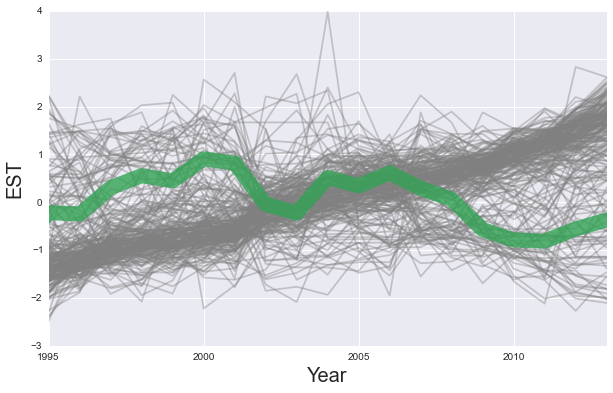

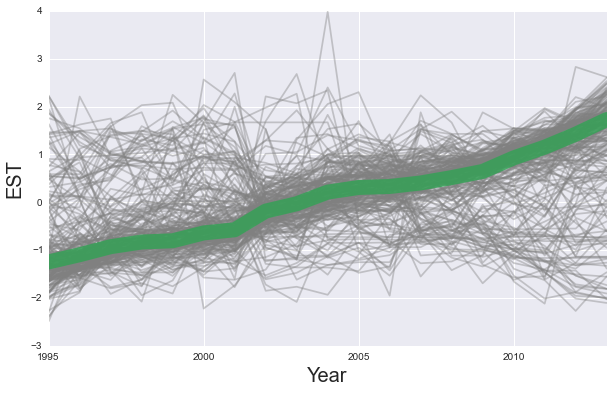

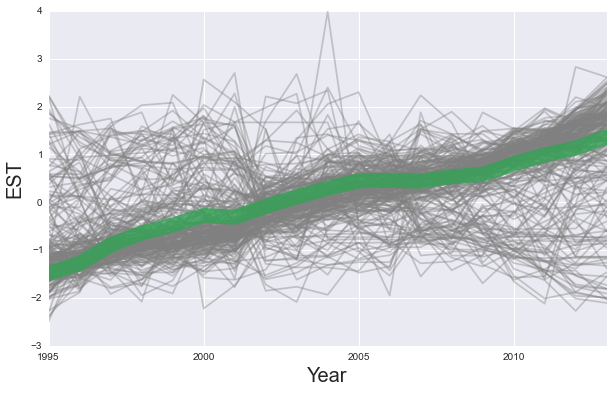

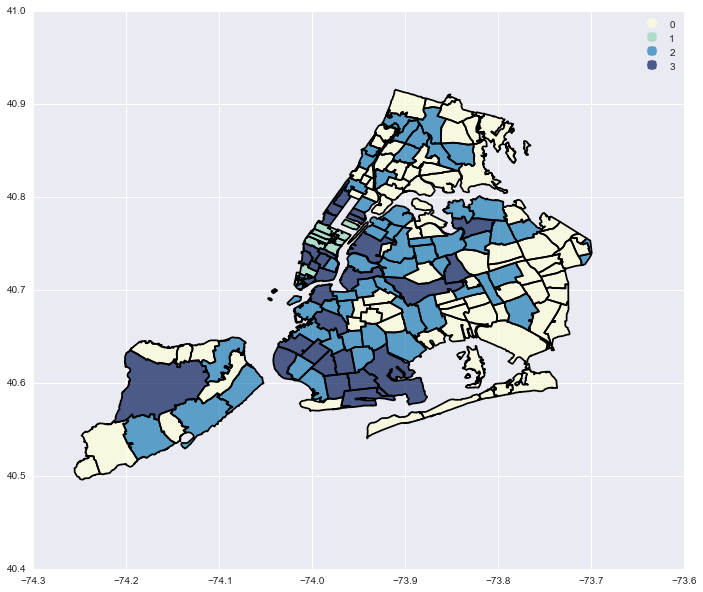

In [367]:
cluster_p(4)

##Other cluster (Affinity propagation)

In [368]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs


# Compute Affinity Propagation
af = AffinityPropagation(preference=-50).fit(dataset2)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

In [371]:
n_clusters_ = len(cluster_centers_indices)
n_clusters_

7

In [372]:
df_label = pd.DataFrame({'label':labels})
df_label.index = zzp
dataset3 = dataset2.join(df_label)

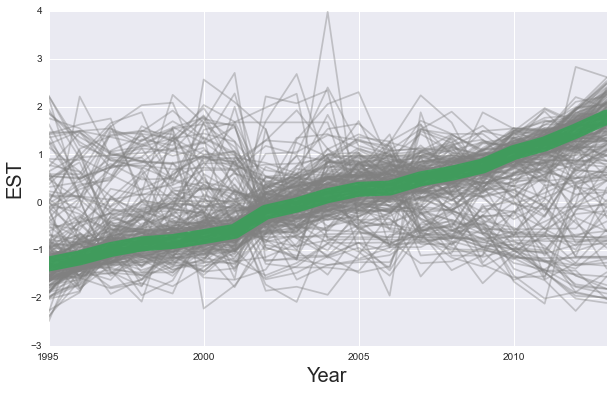

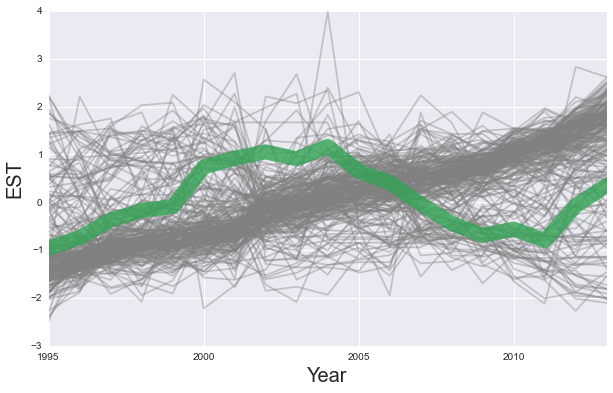

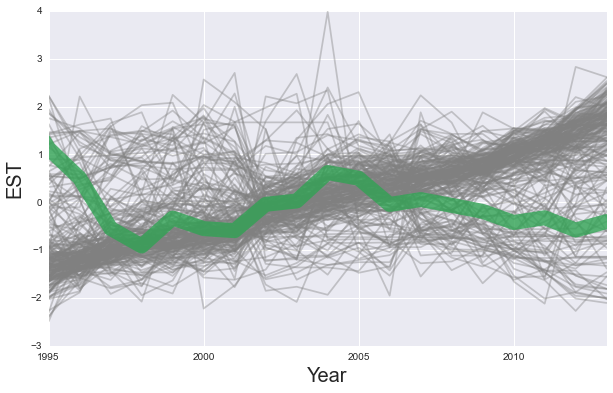

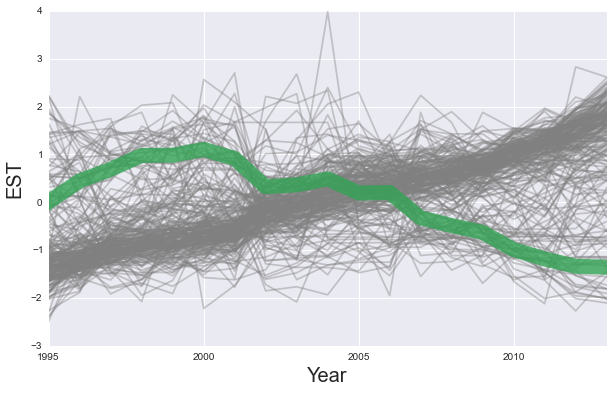

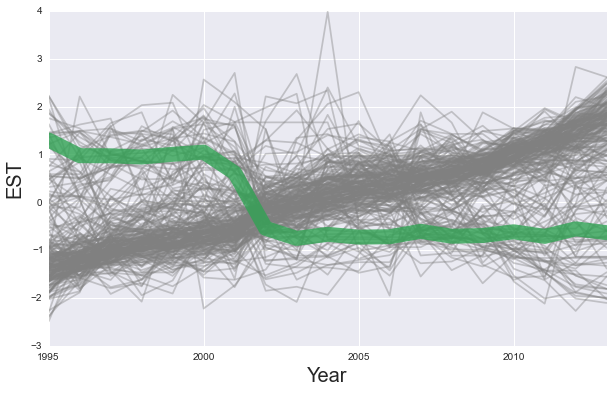

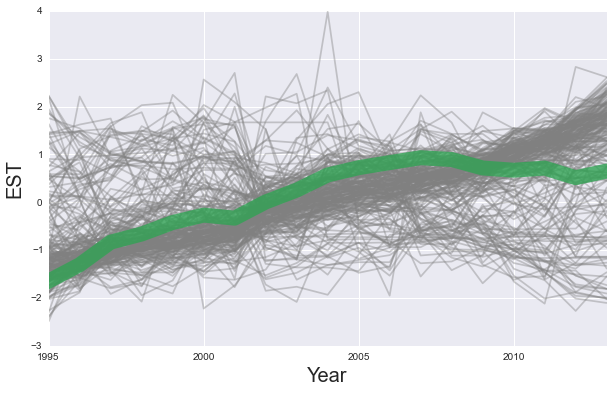

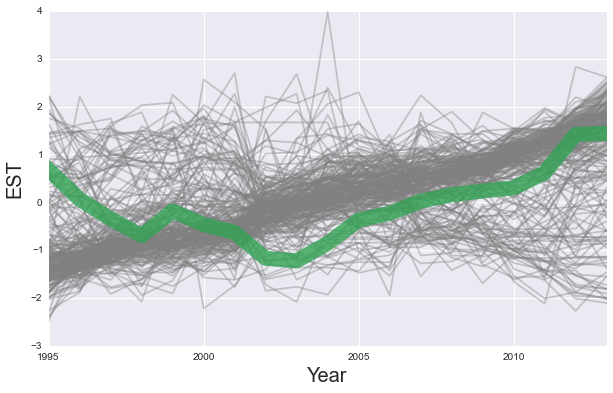

In [373]:
cluster_plot(7,dataset3)

/Users/luke/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


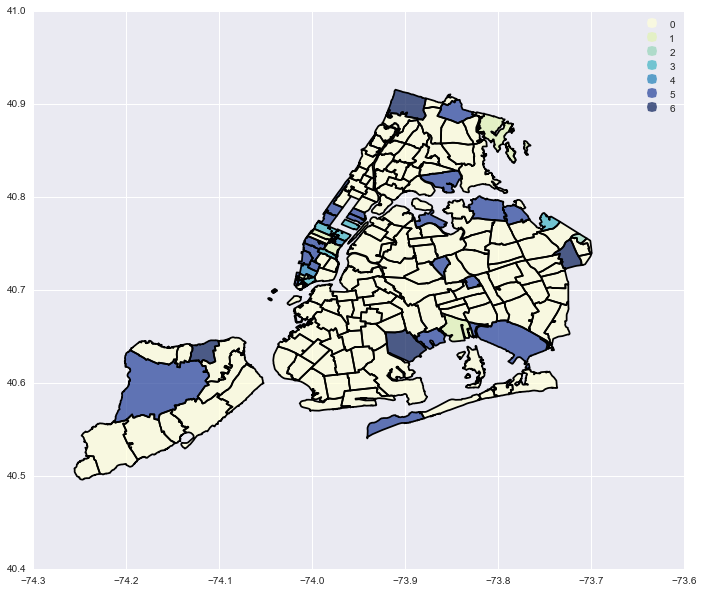

In [374]:
cluster_geoplot(7,dataset3)

##Comment:

 - Compare to two methods, Affinity propagation method has more cluster, however, the result of affinity propagation cannot be interpret. The kmeans method with 2 or cluster would be better.
 
- If you look at results of kmeans cluster with 2 or 3 clusters, it is seems like the result may have relationship with their median income level or economy development level.